# Data Science Fundamentals
## Lesson 1: Linear Regression
Last Updated on August 17, 2021  |  Created by Brandi Beals

Linear **regression** is a machine learning technique that is part of the **supervised** category. This category requires labeled data, which means the data set used to train a model contains examples the model can learn from. Typically labeled data is historical in nature where the answers are already known. Our goal is to use this historical knowledge and create a model that can accurately predict what the label will be for data the model hasn't seen before.

![Types of Machine Learning](https://www.kindpng.com/picc/m/158-1585451_coding-deep-learning-for-beginners-machine-learning-algorithms.png)

In a data set used for supervised learning, there are **independent variables** that we hope will do a relatively good job at predicting our labeled **dependent variable**. A regression problem focuses on predicting a numerical value that could exist anywhere along the spectrum (i.e. numbers with precise decimals). Futher, a linear regression assumes a linear relationship (as opposed to a non-linear relationship) between the independent and dependent variables, which determines the type of math used behind the scenes.

**In this tutorial, we're using broad market indicators (like exchange rate) to try and predict Amazon's stock price**

The math (i.e. algorithms) used to train a model relies on a variety of assumptions. Ensuring these assumptions are met is one of the most important things you must do. In this lesson we will follow a standard machine learning process:
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Featuring Engineering](#Featuring-Engineering)
- [Split Data](#Split-Data)
- [Create Model](#Create-Model)
- [Evaluate Performance](#Evaluate-Performance)
- [Iterate](#Iterate)
- [Make Predictions](#Make-Predictions)

### Import Packages

In [1]:
import yfinance as yf                        # https://pypi.org/project/yfinance/
import pandas_datareader as pdr              # https://pandas-datareader.readthedocs.io/en/latest/
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Wrangling
- get the data (size and shape)
- understand the features (units of measurement, descriptive statistics)
- clean the data if needed (feature names, data types)
- transform into a different shape if needed (reshaping)

In [2]:
# Amazon Stock Price and Volume
# this package is currently experiencing an issue, so we'll be using a csv file instead
# but in the future, you can use the Yahoo Finance package to download Amazon stock prices via API
# amzn = yf.download("AMZN", start='2018-01-02', end='2020-10-28')

amzn = pd.read_csv('Prices_AMZN.csv')        # read in csv file since we can't get programmatically (bummer)
amzn['Date'] = pd.to_datetime(amzn['Date'])  # convert Date column to an actual DateTime data type
amzn = amzn.set_index('Date')                # set Date column as index
print(amzn.shape)                            # understand the shape of this dataframe (rows x columns)
print(amzn.dtypes)                           # view data types for the columns of data
amzn.head()                                  # view the first few rows of data

(712, 7)
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Ticker        object
dtype: object


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500,AMZN
2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800,AMZN
2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100,AMZN
2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700,AMZN
2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500,AMZN


In [3]:
print(amzn.first('1D'))                      # view first date in data set (take note of minimum date)
print(amzn.last('1D'))                       # view last date in data set (take note of maximum date)
print(amzn.describe(include=['number']))     # get summary statistics for all numeric fields (look for oddities)

              Open    High         Low       Close   Adj Close   Volume Ticker
Date                                                                          
2018-01-02  1172.0  1190.0  1170.51001  1189.01001  1189.01001  2694500   AMZN
                   Open        High          Low        Close    Adj Close  \
Date                                                                         
2020-10-28  3249.300049  3264.02002  3162.469971  3162.780029  3162.780029   

             Volume Ticker  
Date                        
2020-10-28  5588300   AMZN  
              Open         High          Low        Close    Adj Close  \
count   712.000000   712.000000   712.000000   712.000000   712.000000   
mean   1969.124102  1991.580660  1943.836798  1968.780154  1968.780154   
std     514.032337   522.356915   503.879182   512.847289   512.847289   
min    1172.000000  1190.000000  1170.510010  1189.010010  1189.010010   
25%    1670.687500  1689.852478  1642.250000  1665.530029  1665.530029 

In [4]:
# US/Euro Exchange Rate
# https://fred.stlouisfed.org/series/DEXUSEU
mkt = pdr.get_data_fred('DEXUSEU')           # get data from API
mkt.columns = ['Exchange Rate']              # rename column so it makes sense
print(mkt.shape)                             # understand the shape of this dataframe
print(mkt.dtypes)                            # view data types for the columns of data
mkt.head()                                   # view the first few rows of data

(1301, 1)
Exchange Rate    float64
dtype: object


,Exchange Rate
DATE,
2016-08-26,1.1237
2016-08-29,1.1182
2016-08-30,1.1150
2016-08-31,1.1146
2016-09-01,1.1194


In [5]:
print(mkt.first('1D'))                       # view first date in data set (take note of minimum date)
print(mkt.last('1D'))                        # view last date in data set (take note of maximum date)
print(mkt.describe(include=['number']))      # get summary statistics for all numeric fields (look for oddities)

            Exchange Rate
DATE                     
2016-08-26         1.1237
            Exchange Rate
DATE                     
2021-08-20          1.169
       Exchange Rate
count    1243.000000
mean        1.146639
std         0.048321
min         1.037500
25%         1.111700
50%         1.140600
75%         1.183150
max         1.248800


In [6]:
data = amzn.merge(mkt, how='inner', left_index=True, right_index=True)  # join the two tables together
data = data.drop('Ticker', axis=1)                                      # drop the Ticker column
data.head()                                                             # view the first few rows of data

,Open,High,Low,Close,Adj Close,Volume,Exchange Rate
2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500,1.2050
2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800,1.2030
2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100,1.2064
2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700,1.2039
2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500,1.1973


### Exploratory Data Analysis
- visualize data (boxplot, distribution plots)
- identify relationships (scatterplot, pairs plot)
- test for multicollinearity (correlation plot, variance inflation factor)
- test for linear relationship (t-test, ANOVA)

C:\Users\bbeals\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bbeals\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


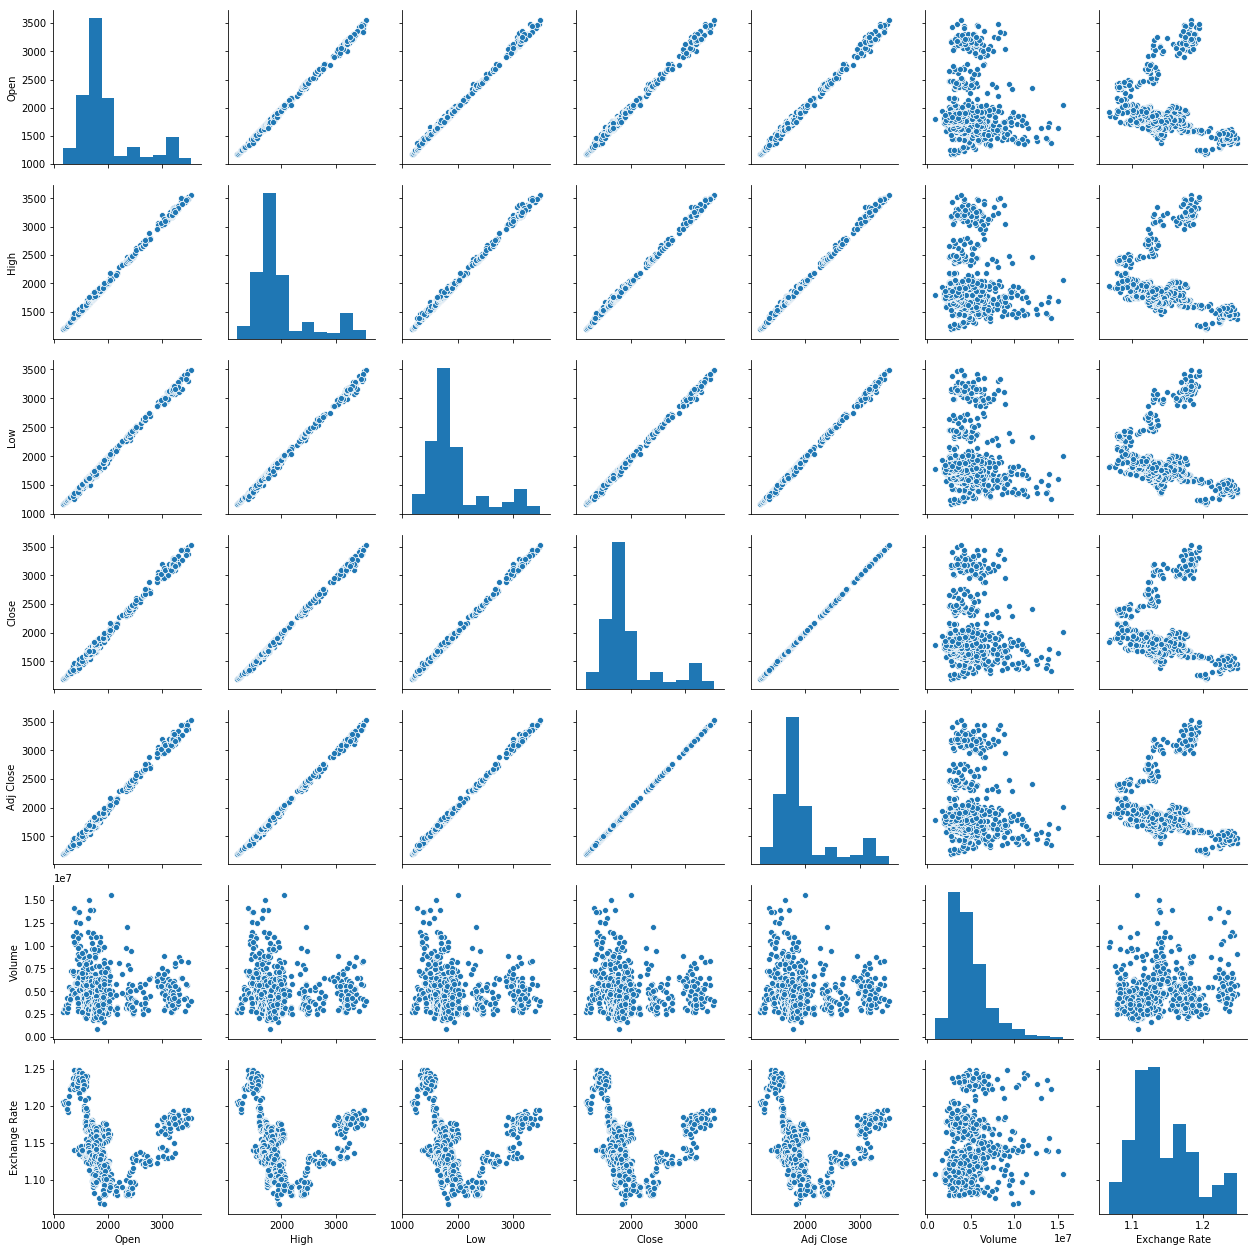

In [7]:
sns.pairplot(data)                           # generate a pairsplot between all variables in the data set
plt.show()                                   # (look for interesting relationships and distributions)

In [8]:
data['Recession'] = data.index > '2020-02-01' # identify records that occur after the recession begins
data['Recession'] = data['Recession'].astype(str)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Exchange Rate,Recession
2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500,1.2050,False
2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800,1.2030,False
2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100,1.2064,False
2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700,1.2039,False
2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500,1.1973,False


#### This is the plot to rule them all... it has almost everything
Check out all the different ways you can customize it: https://www.python-graph-gallery.com/111-custom-correlogram

C:\Users\bbeals\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\bbeals\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


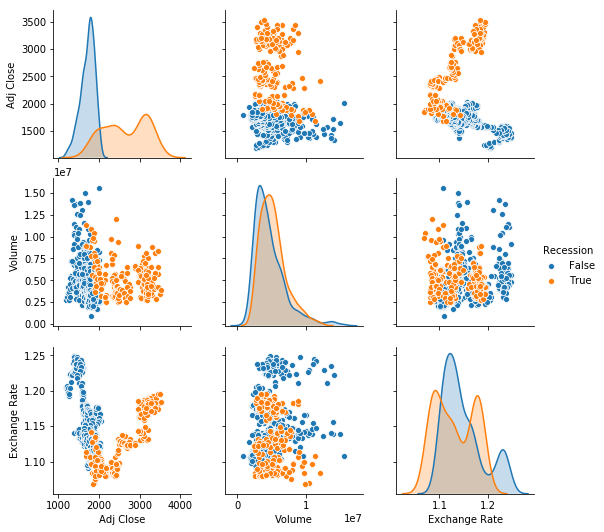

In [9]:
sns.pairplot(data.iloc[:,-4:], hue='Recession') # focus on the last 3 columns of the data set, coloring by Recession
plt.show()

#### Let's start with a univariate linear regression (a single variable)
Which means we don't have to worry about multicollinearity (how correlated independent variables are to each other)

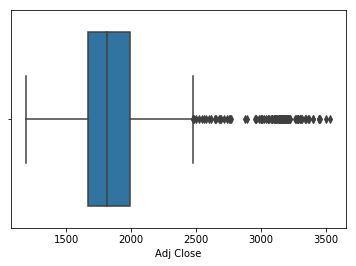

In [10]:
sns.boxplot(data['Adj Close'])               # a boxplot shows statistical outliers in the data
plt.show()

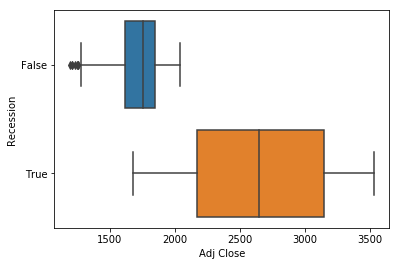

In [11]:
sns.boxplot(x=data['Adj Close'], y=data['Recession'])
plt.show()

### Feature Engineering
- create new features that might be valuable
- transform features if needed (one-hot encoding, log transformation)
- scale data (normalization, standardization)
- handle dirty data (outliers, missing values)

In [12]:
data.isnull().sum()                         # check to see if there are missing values

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Exchange Rate    8
Recession        0
dtype: int64

In [13]:
data = data.dropna(subset=['Exchange Rate']) # remove missing values for a specific column

#### Think about how Recession impacts Adj Close
How should that be handled? Should the data be limited to one type or the other? Or perhaps the Recession field should be part of the model?

#### To scale or not to scale
https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

### Split Data
- divide the data set into a training set and testing set (70/30)
- separate independent and dependent variables

In [14]:
train, test = train_test_split(data, test_size=0.30) # https://realpython.com/train-test-split-python-data/

In [15]:
print(train.shape)
train.head()

(492, 8)


,Open,High,Low,Close,Adj Close,Volume,Exchange Rate,Recession
2018-03-28,1447.000000,1455.900024,1386.170044,1431.420044,1431.420044,13705300,1.2351,False
2020-04-15,2257.679932,2333.370117,2245.000000,2307.679932,2307.679932,6866600,1.0909,True
2018-05-07,1589.339966,1606.949951,1587.829956,1600.140015,1600.140015,3801900,1.1927,False
2019-09-06,1838.219971,1840.650024,1826.400024,1833.510010,1833.510010,2496900,1.1042,False
2020-06-24,2780.000000,2796.000000,2721.000000,2734.399902,2734.399902,4526600,1.1272,True


In [16]:
print(test.shape)
test.head()

(212, 8)


,Open,High,Low,Close,Adj Close,Volume,Exchange Rate,Recession
2020-01-22,1896.089966,1902.500000,1883.339966,1887.459961,1887.459961,3216300,1.1085,False
2020-02-10,2085.010010,2135.600098,2084.959961,2133.909912,2133.909912,5056200,1.0916,True
2018-04-24,1535.800049,1539.500000,1448.449951,1460.089966,1460.089966,7494700,1.2226,False
2018-01-29,1409.180054,1431.390015,1400.439941,1417.680054,1417.680054,5701900,1.2352,False
2019-05-03,1949.000000,1964.400024,1936.000000,1962.459961,1962.459961,6381600,1.1186,False


In [17]:
x_train = train['Exchange Rate'].values.reshape(-1,1)
y_train = train['Adj Close'].values.reshape(-1,1)
x_test = test['Exchange Rate'].values.reshape(-1,1)
y_test = test['Adj Close'].values.reshape(-1,1)

### Create Model
- use only training data on this step
- fit a benchmark model to improve upon with iterations

In [18]:
model = LinearRegression().fit(x_train,y_train)
print(model.intercept_)                # the intercept is the prediction if the independent variable(s) is 0
print(model.coef_)                     # coefficients are multiplicative factors associated with independent variable(s)

[3515.33214255]
[[-1358.72019857]]


### Evaluate Performance
- calculate error metrics (MAE, MSE, RMSE, MAPE)
- calculate model comparison metrics (AIC, BIC, R2)
- visualize residual plot (Q-Q plot, histogram of errors)

In [19]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.012616025489936566
-0.012119052266359231


### Iterate
- include volume in the model (but you'll also need to check for multicollinearity)
- try using different broad market indicators
- create a dummy variable for recession and include in the model
- standardize and normalize the data

In [21]:
data = pd.get_dummies(data)
data = data.drop('Recession_False', axis=1)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Exchange Rate,Recession_True
2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500,1.2050,0
2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800,1.2030,0
2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100,1.2064,0
2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700,1.2039,0
2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500,1.1973,0


In [31]:
train, test = train_test_split(data, test_size=0.30)
x_train = train[['Exchange Rate','Recession_True']].values.reshape(-1,2)
y_train = train['Adj Close'].values.reshape(-1,1)
x_test = test[['Exchange Rate','Recession_True']].values.reshape(-1,2)
y_test = test['Adj Close'].values.reshape(-1,1)

In [32]:
model = LinearRegression().fit(x_train,y_train)
print(model.intercept_)
print(model.coef_)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

[716.88905567]
[[879.08843385 962.72481514]]
0.6561947021792565
0.6165171073388931


### Make Predictions
- use all data and fit the model
- make predictions using the new model

### Resources
The following webpages will help further your knowledge and understanding of linear regression.
- https://www.ibm.com/cloud/learn/data-labeling
- https://towardsdatascience.com/a-checklist-for-linear-regression-bd7b3e47ea91
- https://towardsdatascience.com/machine-learning-algorithms-in-laymans-terms-part-1-d0368d769a7b
- https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-trend-lines/v/fitting-a-line-to-data
- https://www.unite.ai/what-is-linear-regression/
- https://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/
- https://learn.datacamp.com/courses/introduction-to-linear-modeling-in-python